# this notebook combines the country data with genre data. 

In [94]:
import pandas as pd
import reverse_geocode
import matplotlib.pyplot as plt
import numpy as np

In [95]:
colNames = ['drop','track_id','year', 'artist_name', 'artist_id', 'song_title', 'song_beats_persecond', 'song_duration', 'song_end_fade_in', 'song_start_fade_out', 'song_key', 'song_loudness', 'song_loudness_max', 'song_loudness_min', 'song_loudness_med', 'song_loudness_time_max', 'song_loudness_time_min', 'song_loudness_time_med', 'song_mode', 'song_tempo', 'song_time_signature', 'pitch0', 'pitch1', 'pitch2', 'pitch3', 'pitch4', 'pitch5', 'pitch6', 'pitch7', 'pitch8', 'pitch9', 'pitch10', 'pitch11', 'pitch12', 'pitch13', 'pitch14', 'pitch15', 'pitch16', 'pitch17', 'pitch18', 'pitch19', 'pitch20', 'pitch21', 'pitch22', 'pitch23', 'pitch24', 'pitch25', 'pitch26', 'pitch27', 'pitch28', 'pitch29', 'pitch30', 'pitch31', 'pitch32', 'pitch33', 'pitch34', 'pitch35', 'pitch36', 'pitch37', 'pitch38', 'pitch39', 'pitch40', 'pitch41', 'pitch42', 'pitch43', 'pitch44', 'pitch45', 'pitch46', 'pitch47', 'pitch48', 'pitch49', 'pitch50', 'pitch51', 'pitch52', 'pitch53', 'pitch54', 'pitch55', 'pitch56', 'pitch57', 'pitch58', 'pitch59', 'pitch60', 'pitch61', 'pitch62', 'pitch63', 'pitch64', 'pitch65', 'pitch66', 'pitch67', 'pitch68', 'pitch69', 'pitch70', 'pitch71', 'pitch72', 'pitch73', 'pitch74', 'pitch75', 'pitch76', 'pitch77', 'pitch78', 'pitch79', 'pitch80', 'pitch81', 'pitch82', 'pitch83', 'pitch84', 'pitch85', 'pitch86', 'pitch87', 'pitch88', 'pitch89', 'timbre0', 'timbre1', 'timbre2', 'timbre3', 'timbre4', 'timbre5', 'timbre6', 'timbre7', 'timbre8', 'timbre9', 'timbre10', 'timbre11', 'timbre12', 'timbre13', 'timbre14', 'timbre15', 'timbre16', 'timbre17', 'timbre18', 'timbre19', 'timbre20', 'timbre21', 'timbre22', 'timbre23', 'timbre24', 'timbre25', 'timbre26', 'timbre27', 'timbre28', 'timbre29', 'timbre30', 'timbre31', 'timbre32', 'timbre33', 'timbre34', 'timbre35', 'timbre36', 'timbre37', 'timbre38', 'timbre39', 'timbre40', 'timbre41', 'timbre42', 'timbre43', 'timbre44', 'timbre45', 'timbre46', 'timbre47', 'timbre48', 'timbre49', 'timbre50', 'timbre51', 'timbre52', 'timbre53', 'timbre54', 'timbre55', 'timbre56', 'timbre57', 'timbre58', 'timbre59', 'timbre60', 'timbre61', 'timbre62', 'timbre63', 'timbre64', 'timbre65', 'timbre66', 'timbre67', 'timbre68', 'timbre69', 'timbre70', 'timbre71', 'timbre72', 'timbre73', 'timbre74', 'timbre75', 'timbre76', 'timbre77', 'timbre78', 'timbre79', 'timbre80', 'timbre81', 'timbre82', 'timbre83', 'timbre84', 'timbre85', 'timbre86', 'timbre87', 'timbre88', 'timbre89']

In [180]:
all_songs_df = pd.read_csv('all_songs_trackid.csv', index_col=False, encoding='iso-8859-1', header = None)
all_songs_df.columns = colNames
all_songs_df.head()

,drop,track_id,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
0,NaN,track_id,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
1,0.0,TRCCCRP128F147BEFA,1995,Baka Beyond,ARE93YV1187B9937CC,Journey (Album Version),2.279004351,368.14322,0.0,358.905,...,3.752556962,7.258690699,8.160898734,-15.2335421,-1.005168409,-11.9635443,3.2193847,0.321611998,6.035325261,-5.073150798
2,1.0,TRCCCDI128F427CC1F,1993,The Fleetwoods,AROSQW61187FB5330B,Ten Times Blue,1.429428516,175.59465,0.374,160.142,...,17.22315612,-11.11273629,-20.08858439,-2.014149789,-23.74420253,-14.3200865,5.993278481,1.540968354,1.165962025,14.94670675
3,2.0,TRCCCMQ128F42AE752,2006,Joe Satriani,ARNZ70R1187B9A4824,It's So Good,1.389051512,254.85016,0.113,238.939,...,19.697,3.334592326,-5.095906475,-17.35214868,-1.111425659,-3.73179976,18.99995683,-1.012593525,3.487135492,2.075859712
4,3.0,TRCCCJT128F429FFF6,1999,Middle Of The Road,AR0TAEM1187FB36C4B,Bonjour ca va,2.122025597,188.49914,6.432,181.087,...,45.66777327,5.851711712,-16.40231081,1.461624625,12.52435586,5.322093093,3.174717718,-3.725414414,-2.448765766,1.7181997


In [181]:
all_songs_df.drop('drop', axis = 1, inplace=True)

In [98]:
genre_df = pd.read_csv('song_genre.csv', index_col=False, encoding='iso-8859-1', header = None)

In [99]:
genre_df.reset_index(inplace=True, drop=True)
genre_df.columns = ['track_id', 'genre']
genre_df.head()

,track_id,genre
0,TRAAAAK128F9318786,Rock
1,TRAAAAW128F429D538,Rap
2,TRAAADJ128F4287B47,Rock
3,TRAAADZ128F9348C2E,Latin
4,TRAAAED128E0783FAB,Jazz


In [182]:
list_trackids = genre_df['track_id']
subset_df = all_songs_df.loc[all_songs_df['track_id'].isin(list_trackids)]
subset_df.head()

,track_id,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
3,TRCCCMQ128F42AE752,2006,Joe Satriani,ARNZ70R1187B9A4824,It's So Good,1.389051512,254.85016,0.113,238.939,7,...,19.697,3.334592326,-5.095906475,-17.35214868,-1.111425659,-3.73179976,18.99995683,-1.012593525,3.487135492,2.075859712
4,TRCCCJT128F429FFF6,1999,Middle Of The Road,AR0TAEM1187FB36C4B,Bonjour ca va,2.122025597,188.49914,6.432,181.087,2,...,45.66777327,5.851711712,-16.40231081,1.461624625,12.52435586,5.322093093,3.174717718,-3.725414414,-2.448765766,1.7181997
5,TRCCCAQ128E079937C,2001,Nightwish,AR74Q3R1187B9B24C3,Over The Hills And Far Away,2.217179821,300.38159,0.229,272.805,4,...,9.371831818,-7.577228409,-7.389075,-30.08861705,16.37749318,-2.032506818,6.720626136,4.166784091,-1.135157955,3.190865909
7,TRCCCEW128F42AF457,2006,Tyrese,AR4TMIS1187FB52CE1,Gotta Get You,2.047109108,267.20608,0.078,254.404,11,...,0.147166848,-9.709772083,23.88408942,-15.5492879,4.81548964,-5.441187568,3.058231189,-2.981068702,-6.974888768,-0.904112323
8,TRCCCPY128F92E7BFF,1994,Blossom Dearie,ARLPFWM1187FB4CCCB,I Won't Dance,2.578815729,167.13098,0.0,161.007,4,...,-12.48380032,-9.753898551,-9.189235105,10.40893881,-33.07076167,-1.510819646,29.01132045,15.47307407,-6.748396135,8.693491143


In [183]:
subset_df.shape

(126392, 200)

In [184]:
list_trackids = subset_df['track_id']
len(list_trackids)

126392

In [185]:
subset_genre_df = genre_df.loc[genre_df['track_id'].isin(list_trackids)]
subset_genre_df.shape

(126392, 2)

In [186]:
subset_genre_df.head()

,track_id,genre
0,TRAAAAK128F9318786,Rock
6,TRAAAEM128F93347B9,Electronic
7,TRAAAGF12903CEC202,Pop
8,TRAAAGR128F425B14B,Pop
10,TRAAAIC128F14A5138,Rock


In [187]:
final_df = pd.merge(subset_df, subset_genre_df, on=['track_id'])
final_df.head()

,track_id,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,...,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89,genre
0,TRCCCMQ128F42AE752,2006,Joe Satriani,ARNZ70R1187B9A4824,It's So Good,1.389051512,254.85016,0.113,238.939,7,...,3.334592326,-5.095906475,-17.35214868,-1.111425659,-3.73179976,18.99995683,-1.012593525,3.487135492,2.075859712,Rock
1,TRCCCJT128F429FFF6,1999,Middle Of The Road,AR0TAEM1187FB36C4B,Bonjour ca va,2.122025597,188.49914,6.432,181.087,2,...,5.851711712,-16.40231081,1.461624625,12.52435586,5.322093093,3.174717718,-3.725414414,-2.448765766,1.7181997,Pop
2,TRCCCAQ128E079937C,2001,Nightwish,AR74Q3R1187B9B24C3,Over The Hills And Far Away,2.217179821,300.38159,0.229,272.805,4,...,-7.577228409,-7.389075,-30.08861705,16.37749318,-2.032506818,6.720626136,4.166784091,-1.135157955,3.190865909,Metal
3,TRCCCEW128F42AF457,2006,Tyrese,AR4TMIS1187FB52CE1,Gotta Get You,2.047109108,267.20608,0.078,254.404,11,...,-9.709772083,23.88408942,-15.5492879,4.81548964,-5.441187568,3.058231189,-2.981068702,-6.974888768,-0.904112323,RnB
4,TRCCCPY128F92E7BFF,1994,Blossom Dearie,ARLPFWM1187FB4CCCB,I Won't Dance,2.578815729,167.13098,0.0,161.007,4,...,-9.753898551,-9.189235105,10.40893881,-33.07076167,-1.510819646,29.01132045,15.47307407,-6.748396135,8.693491143,Jazz


In [188]:
final_df.shape

(126392, 201)

In [189]:
rock_df = final_df.loc[final_df['genre'] == 'Rock']
rock_df.reset_index(inplace=True, drop=True)
rock_df.ix[:,-1] = 1
rock_df.head()

,track_id,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,...,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89,genre
0,TRCCCMQ128F42AE752,2006,Joe Satriani,ARNZ70R1187B9A4824,It's So Good,1.389051512,254.85016,0.113,238.939,7,...,3.334592326,-5.095906475,-17.35214868,-1.111425659,-3.73179976,18.99995683,-1.012593525,3.487135492,2.075859712,1
1,TRCCCSX128F4289EE2,2007,Space Ritual,ARJMPGH11F4C8429C6,The Riddle,2.623150274,407.14404,3.651,403.615,9,...,0.022172208,-25.53283632,-22.34406394,13.12639471,0.696819267,7.574604433,3.805867008,-3.52627451,-1.163487639,1
2,TRCCCNU128F92F527F,2008,3 Doors Down,ARW1MUW1187FB4D5A1,It's The Only One You've Got,2.116365559,257.04444,0.356,245.696,9,...,-7.972226054,-8.311925926,-6.975942529,4.491166028,-3.488112388,-3.213597701,-4.55699106,-1.702067688,11.65551724,1
3,TRCCCYE12903CFF0E9,1991,The Nice,ARIY5ZP1187FB57964,Brandenburger,1.737655957,264.72444,0.322,261.033,7,...,-12.2766334,-17.54744242,-11.78769194,9.381283109,13.01771401,-7.757835893,7.752635317,-2.949644914,21.27589347,1
4,TRCCZOW128F146A22D,1999,Marianne Faithfull,AR9FKRD1187B9B73D4,Great Expectations,1.238377313,193.802,0.421,183.281,11,...,-13.65402135,-14.2572669,-20.14085053,5.335119217,-9.126234875,9.746357651,0.141405694,-2.212238434,-15.13367082,1


In [190]:
rock_df.shape

(49614, 201)

In [109]:
import sqlite3
engine = sqlite3.connect('USRockDB')
rock_df.to_sql('songs', engine, if_exists='replace', index = False)

# data generation and prediction for genre

In [191]:
non_rock_df = final_df.loc[final_df['genre'] != 'Rock']
non_rock_df.reset_index(inplace=True, drop=True)
non_rock_df.ix[:,-1] = 0
non_rock_df.head()

,track_id,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,...,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89,genre
0,TRCCCJT128F429FFF6,1999,Middle Of The Road,AR0TAEM1187FB36C4B,Bonjour ca va,2.122025597,188.49914,6.432,181.087,2,...,5.851711712,-16.40231081,1.461624625,12.52435586,5.322093093,3.174717718,-3.725414414,-2.448765766,1.7181997,0
1,TRCCCAQ128E079937C,2001,Nightwish,AR74Q3R1187B9B24C3,Over The Hills And Far Away,2.217179821,300.38159,0.229,272.805,4,...,-7.577228409,-7.389075,-30.08861705,16.37749318,-2.032506818,6.720626136,4.166784091,-1.135157955,3.190865909,0
2,TRCCCEW128F42AF457,2006,Tyrese,AR4TMIS1187FB52CE1,Gotta Get You,2.047109108,267.20608,0.078,254.404,11,...,-9.709772083,23.88408942,-15.5492879,4.81548964,-5.441187568,3.058231189,-2.981068702,-6.974888768,-0.904112323,0
3,TRCCCPY128F92E7BFF,1994,Blossom Dearie,ARLPFWM1187FB4CCCB,I Won't Dance,2.578815729,167.13098,0.0,161.007,4,...,-9.753898551,-9.189235105,10.40893881,-33.07076167,-1.510819646,29.01132045,15.47307407,-6.748396135,8.693491143,0
4,TRCCCME128F9321775,2004,KRS-One,AR2SGQW1187B9B9E7C,Dream,3.739786005,63.37261,0.351,63.373,6,...,-27.00346875,15.24032422,32.68240234,-34.05717578,0.622394531,-15.17423047,8.139984375,-11.36285547,20.43671875,0


In [192]:
non_rock_df.shape

(76778, 201)

In [112]:
from sklearn.model_selection import train_test_split

In [193]:
non_train_x, non_test_x, non_train_y, non_test_y = train_test_split(non_rock_df.ix[:, 5:200], non_rock_df.ix[:, -1], test_size = 0.1)

In [194]:
non_rock_df.ix[:, 5:201].head()

,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,song_loudness,song_loudness_max,song_loudness_min,song_loudness_med,song_loudness_time_max,...,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89,genre
0,2.122025597,188.49914,6.432,181.087,2,-7.202,0.1,1e-06,0.1,0.050389,...,5.851711712,-16.40231081,1.461624625,12.52435586,5.322093093,3.174717718,-3.725414414,-2.448765766,1.7181997,0
1,2.217179821,300.38159,0.229,272.805,4,-5.401,0.1,1e-06,0.1,0.114726,...,-7.577228409,-7.389075,-30.08861705,16.37749318,-2.032506818,6.720626136,4.166784091,-1.135157955,3.190865909,0
2,2.047109108,267.20608,0.078,254.404,11,-4.156,0.1,1e-06,0.1,0.079429,...,-9.709772083,23.88408942,-15.5492879,4.81548964,-5.441187568,3.058231189,-2.981068702,-6.974888768,-0.904112323,0
3,2.578815729,167.13098,0.0,161.007,4,-19.437,0.1,1e-05,0.001,0.013145,...,-9.753898551,-9.189235105,10.40893881,-33.07076167,-1.510819646,29.01132045,15.47307407,-6.748396135,8.693491143,0
4,3.739786005,63.37261,0.351,63.373,6,-14.209,0.1,1e-06,0.01,0.01407,...,-27.00346875,15.24032422,32.68240234,-34.05717578,0.622394531,-15.17423047,8.139984375,-11.36285547,20.43671875,0


In [195]:
non_train_x.head()

,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,song_loudness,song_loudness_max,song_loudness_min,song_loudness_med,song_loudness_time_max,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
1495,2.0025,175.281,0.369,175.281,10,-7.73,0.1,1e-06,0.01,0.017024,...,-15.0004,-5.04174,2.50395,10.5249,-14.3308,2.92965,-2.63392,2.83823,-5.93713,0.0391328
73369,1.14996,282.618,0.551,277.815,5,-7.583,0.1,1e-06,0.1,0.095295,...,56.9099,-0.836249,-39.804,-0.532542,-14.5924,-4.25566,-2.53036,-9.87026,0.527655,0.460038
65433,1.83574,208.091,0,204.672,4,-3.878,0.1,0.001,0.1,0.052012,...,3.37852,-3.87509,-12.3538,-7.88213,-7.54121,-1.16135,22.6527,6.25172,-0.63972,0.020815
60221,2.22728,380.734,0,368.274,11,-9.673,0.1,1e-05,0.01,0.023569,...,-24.3453,6.40929,0.0626566,-20.3826,-2.4636,-1.20995,2.29915,0.540479,9.01578,0.265653
65528,1.46409,172.12,0.264,166.766,1,-37.964,0.0001,1e-06,1e-05,4.83e-05,...,-49.9509,-55.7834,119.119,-30.355,-37.3139,5.10597,5.3587,20.7496,-10.4124,-24.6991


In [196]:
non_train_x.shape

(69100, 195)

In [197]:
non_test_x.shape

(7678, 195)

In [198]:
rock_train_x, rock_test_x, rock_train_y, rock_test_y = train_test_split(rock_df.ix[:, 5:200], rock_df.ix[:, -1], test_size = 0.1)

In [199]:
rock_train_x.shape

(44652, 195)

In [200]:
rock_train_x['genre'] = rock_train_y

In [201]:
rock_test_x['genre'] = rock_test_y

In [202]:
rock_test_x.shape

(4962, 196)

In [203]:
non_train_x['genre'] = non_train_y

In [204]:
non_test_x['genre'] = non_test_y

In [205]:
train_df = rock_train_x.append(non_train_x)
train_df.shape

(113752, 196)

In [206]:
train_df.reset_index(drop=True, inplace=True)
train_df.head()

,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,song_loudness,song_loudness_max,song_loudness_min,song_loudness_med,song_loudness_time_max,...,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89,genre
0,1.99943,239.569,0,229.79,0,-4.303,0.1,1e-05,0.1,0.056125,...,-1.34437,-20.6025,-11.6865,-2.96694,-11.7,7.45924,0.171473,1.75764,-5.52661,1
1,2.64118,222.249,0.276,213.444,1,-6.377,0.1,1e-06,0.01,0.109749,...,-13.6083,2.85217,-18.5447,-1.59063,-5.65022,-0.795653,-1.86056,-1.42571,2.87059,1
2,1.92233,211.722,0.165,194.699,2,-4.914,0.1,1e-06,0.1,0.035932,...,-0.603044,-20.13,-12.5449,1.58507,-10.8397,-7.54966,-13.2317,1.27152,-7.45795,1
3,1.75334,266.919,0.113,245.017,7,-14.217,0.01,1e-06,0.01,0.0047987,...,4.87242,-0.229537,-10.9259,-5.19346,-3.7011,-1.03807,-2.44914,4.43185,0.272921,1
4,2.49521,373.916,0,360.705,9,-7.026,0.1,1e-05,0.1,0.093884,...,-3.96586,-8.80685,-15.8318,-19.9224,-8.59976,23.0307,0.267439,0.566456,-5.25395,1


In [207]:
test_df = rock_test_x.append(non_test_x)
test_df.shape

(12640, 196)

In [208]:
test_df.reset_index(drop=True, inplace=True)

In [209]:
train_df = train_df.reindex(np.random.permutation(train_df.index))

In [210]:
train_df.head(20)

,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,song_loudness,song_loudness_max,song_loudness_min,song_loudness_med,song_loudness_time_max,...,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89,genre
42350,1.51403,225.227,0,203.894,3,-13.871,0.1,1e-05,0.01,0.012556,...,-8.93712,-13.2526,-8.48074,-5.61475,-4.58421,-6.00712,-5.03518,-1.483,4.00851,1
75276,2.44494,205.322,1,185.272,11,-5.418,0.1,1e-06,0.1,0.044524,...,-2.77769,-20.5792,-21.5176,3.16489,-6.36939,6.65707,6.91049,-0.519962,-4.84497,0
24143,1.37193,316.342,0.194,298.719,5,-4.543,0.1,1e-06,0.1,0.150469,...,-11.3927,-11.117,-16.1326,-17.7006,-8.21875,5.30604,0.844164,0.922847,5.51853,1
112924,2.39355,323.787,17.067,318.851,11,-9.172,0.1,1e-06,0.01,0.025177,...,2.18679,-17.8332,-14.4903,-5.86178,-2.97534,18.9751,5.18908,1.82685,-2.3408,0
51360,2.47438,300.277,0,281.902,11,-8.968,0.1,1e-05,0.01,0.031218,...,-3.09219,19.0828,-7.72943,-22.4844,-4.80954,2.67299,-1.29279,0.226995,-0.0954827,0
38520,1.97261,300.617,0.473,289.57,9,-6.719,0.1,1e-06,0.1,0.031969,...,-4.9945,-4.82308,-4.49161,16.2156,-13.2145,7.68172,-8.58001,-5.88501,-7.48946,1
57222,2.40069,246.595,0.258,239.978,4,-9.4,0.1,1e-06,0.01,0.035322,...,-15.5289,-6.24529,6.2047,-11.3268,-6.55169,3.20105,-1.60902,-0.0754718,12.9788,0
32280,2.89248,159.033,2.612,154.088,1,-11.713,0.1,1e-06,0.01,0.010937,...,-6.9457,-40.7205,-16.8304,-17.6437,-5.47603,33.5842,14.6224,-1.16241,1.21276,1
101933,2.7746,243.278,0.223,239.671,1,-6.765,0.1,1e-06,0.1,0.020207,...,14.861,11.0793,27.3092,13.2918,11.5957,-4.07441,5.95547,-20.0283,-10.3222,0
15729,2.01537,188.551,0.279,172.698,9,-10.655,0.1,1e-06,0.01,0.027734,...,-15.514,-36.4854,-6.64197,-20.873,-14.5729,25.1504,4.52602,-2.19384,-1.3855,1


In [211]:
test_df = test_df.reindex(np.random.permutation(test_df.index))
test_df.head(20)

,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,song_loudness,song_loudness_max,song_loudness_min,song_loudness_med,song_loudness_time_max,...,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89,genre
300,1.89739,278.804,0.096,260.447,11,-13.604,0.1,1e-06,0.01,0.087048,...,-11.1748,3.52752,-19.694,-4.63757,1.50343,-1.11209,-7.78338,7.21741,17.7735,1
4962,2.45206,295.262,0,295.262,11,-7.312,0.1,0.01,0.1,0.140921,...,-17.8405,-48.1011,-23.2354,-12.2777,5.66273,24.2767,12.1934,0.989046,5.56866,0
8259,2.05377,209.371,0.183,186.921,5,-15.427,0.1,1e-06,0.01,0.030248,...,-9.06858,-7.04087,1.81852,-26.0873,-12.6991,7.58828,-5.66982,4.55786,24.2047,0
5131,1.85931,235.572,0.165,231.822,4,-9.292,0.1,1e-06,0.01,0.019615,...,3.97774,13.3542,0.0821578,-14.6132,5.90878,-4.68954,10.6636,-2.80714,6.17832,0
2205,2.3389,268.93,0.096,268.93,1,-6.601,0.1,1e-06,0.1,0.092701,...,1.32427,-21.8683,-18.8889,15.5984,0.824175,10.6682,1.18618,-1.58983,1.1372,1
416,2.00581,128.626,3.587,122.021,4,-5.941,0.1,1e-06,0.1,0.028213,...,3.97125,-49.269,-2.58303,-24.006,-13.9759,16.4367,-2.19755,3.36454,1.55536,1
11795,3.08172,285.231,0.27,278.854,3,-5.306,0.1,1e-06,0.1,0.033247,...,14.0664,-15.2067,-1.27994,0.0211935,0.166349,11.0791,16.6568,2.35579,3.33271,0
1283,2.29897,344.502,1.226,325.968,11,-6.5,0.1,1e-06,0.1,0.051045,...,-8.10016,-19.7509,-15.942,-15.4882,-10.8577,5.24517,-3.71684,1.85939,-0.608296,1
3158,3.68546,248.816,4.052,239.107,2,-12.393,0.1,1e-06,0.01,0.016857,...,37.537,-32.0135,-7.84571,21.3917,3.54152,3.93928,8.75081,1.13834,2.44007,1
9165,3.1007,424.098,0,418.818,2,-9.002,0.1,1e-05,0.01,0.039333,...,-3.83808,-0.942175,-15.1161,-1.63362,-4.50163,5.31756,2.24612,0.687213,-2.22171,0


# Models

In [132]:
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostClassifier

In [133]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

In [212]:
train_df = train_df.astype(float)
train_df.dtypes

song_beats_persecond      float64
song_duration             float64
song_end_fade_in          float64
song_start_fade_out       float64
song_key                  float64
song_loudness             float64
song_loudness_max         float64
song_loudness_min         float64
song_loudness_med         float64
song_loudness_time_max    float64
song_loudness_time_min    float64
song_loudness_time_med    float64
song_mode                 float64
song_tempo                float64
song_time_signature       float64
pitch0                    float64
pitch1                    float64
pitch2                    float64
pitch3                    float64
pitch4                    float64
pitch5                    float64
pitch6                    float64
pitch7                    float64
pitch8                    float64
pitch9                    float64
pitch10                   float64
pitch11                   float64
pitch12                   float64
pitch13                   float64
pitch14       

In [213]:
#train_df.reset_index(inplace=True, drop=True)
train_cr = train_df.ix[:,0:-181]
train_cr.insert(15, 'genre', train_df['genre'])
cr = train_cr.corr()
cr.shape

(16, 16)

In [214]:
cr.head(16)

,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,song_loudness,song_loudness_max,song_loudness_min,song_loudness_med,song_loudness_time_max,song_loudness_time_min,song_loudness_time_med,song_mode,song_tempo,song_time_signature,genre
song_beats_persecond,1.000000,-0.009539,-0.031673,-0.004522,0.010610,0.160199,0.021787,0.044869,0.139842,0.023138,0.056877,0.120974,-0.006993,0.997150,0.050678,0.024577
song_duration,-0.009539,1.000000,0.110658,0.997275,0.013797,-0.067786,-0.008947,-0.059157,-0.097987,0.043534,-0.081384,-0.163791,-0.064358,-0.027689,0.090118,-0.096995
song_end_fade_in,-0.031673,0.110658,1.000000,0.106830,-0.006094,-0.092015,-0.021417,-0.031087,-0.070896,-0.001290,-0.041995,-0.078261,-0.004965,-0.028768,-0.010348,0.009478
song_start_fade_out,-0.004522,0.997275,0.106830,1.000000,0.014659,-0.058586,-0.006467,-0.055070,-0.089396,0.045124,-0.075840,-0.154804,-0.064772,-0.023883,0.089993,-0.098247
song_key,0.010610,0.013797,-0.006094,0.014659,1.000000,0.029512,0.010192,0.002541,0.017910,0.004198,0.005011,0.015024,-0.191628,0.009120,0.006296,-0.008548
song_loudness,0.160199,-0.067786,-0.092015,-0.058586,0.029512,1.000000,0.296123,0.101407,0.718144,0.152751,0.140431,0.704843,-0.004826,0.153938,0.083982,0.160227
song_loudness_max,0.021787,-0.008947,-0.021417,-0.006467,0.010192,0.296123,1.000000,0.028474,0.200894,0.120631,0.038409,0.224273,-0.013761,0.017956,0.025046,-0.035154
song_loudness_min,0.044869,-0.059157,-0.031087,-0.055070,0.002541,0.101407,0.028474,1.000000,0.099919,0.051416,0.783461,0.131321,-0.000285,0.047103,-0.014535,0.015261
song_loudness_med,0.139842,-0.097987,-0.070896,-0.089396,0.017910,0.718144,0.200894,0.099919,1.000000,0.182216,0.145572,0.878950,0.000630,0.138159,0.042310,0.163770
song_loudness_time_max,0.023138,0.043534,-0.001290,0.045124,0.004198,0.152751,0.120631,0.051416,0.182216,1.000000,0.086352,0.232359,0.001838,0.022239,0.015713,0.074772


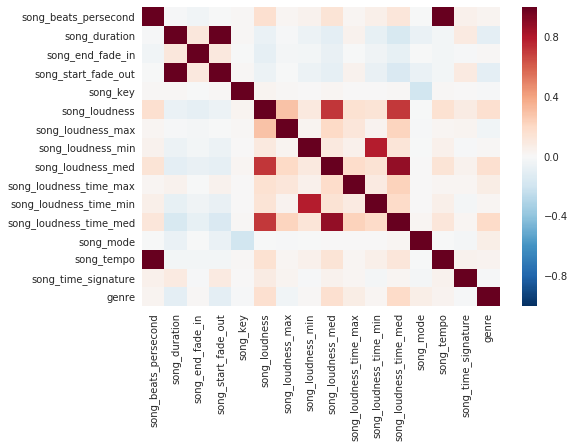

In [215]:
import seaborn as sns
sns.heatmap(cr)
plt.show()

In [216]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
forml = 'genre ~ song_beats_persecond + song_duration + song_end_fade_in + song_start_fade_out + song_key + song_loudness + song_loudness_max + song_loudness_min + song_loudness_med + song_loudness_time_max + song_loudness_time_min + song_loudness_time_med + song_mode + song_tempo + song_time_signature'
cw_lm=ols(formula = forml, data=train_df).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

                              sum_sq        df           F         PR(>F)
song_beats_persecond      182.355843       1.0  819.557155  1.317434e-179
song_duration               9.228061       1.0   41.473437   1.199576e-10
song_end_fade_in           20.273032       1.0   91.112562   1.382804e-21
song_start_fade_out        13.061990       1.0   58.704164   1.846935e-14
song_key                    0.067327       1.0    0.302584   5.822682e-01
song_loudness             139.961967       1.0  629.027454  1.940294e-138
song_loudness_max         216.395507       1.0  972.540737  1.326299e-212
song_loudness_min           0.192158       1.0    0.863612   3.527319e-01
song_loudness_med          11.286675       1.0   50.725414   1.068610e-12
song_loudness_time_max     50.447079       1.0  226.723004   3.463054e-51
song_loudness_time_min      7.065058       1.0   31.752306   1.755539e-08
song_loudness_time_med    149.982770       1.0  674.063687  3.541543e-148
song_mode                  90.419817  

In [217]:
trX = train_df.ix[:,2:4]
trX = trX.join(train_df.ix[:,5:7])
trX = trX.join(train_df.ix[:,9])
trX = trX.join(train_df.ix[:,11:14])
trX = trX.join(train_df.ix[:,105:195])
tesX = test_df.ix[:,2:4]
tesX = tesX.join(test_df.ix[:,5:7])
tesX = tesX.join(test_df.ix[:,9])
tesX = tesX.join(test_df.ix[:,11:14])
tesX = tesX.join(test_df.ix[:,105:195])
trainX_df = trX
testX_df = tesX

In [218]:
trainX_df.shape

(113752, 98)

In [219]:
trainX_df.head()

,song_end_fade_in,song_start_fade_out,song_loudness,song_loudness_max,song_loudness_time_max,song_loudness_time_med,song_mode,song_tempo,timbre0,timbre1,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
42350,0.000,203.894,-13.871,0.1,0.012556,0.000536,1.0,94.488,39.507400,35.785456,...,22.220824,-8.937118,-13.252559,-8.480744,-5.614751,-4.584206,-6.007118,-5.035176,-1.482998,4.008513
75276,1.000,185.272,-5.418,0.1,0.044524,0.002687,0.0,147.812,47.605964,-53.422028,...,9.226875,-2.777686,-20.579187,-21.517622,3.164890,-6.369388,6.657068,6.910489,-0.519962,-4.844969
24143,0.194,298.719,-4.543,0.1,0.150469,0.003054,1.0,83.931,43.338815,230.836495,...,11.928855,-11.392693,-11.116993,-16.132613,-17.700632,-8.218755,5.306035,0.844164,0.922847,5.518530
112924,17.067,318.851,-9.172,0.1,0.025177,0.000715,1.0,147.247,37.351146,61.705052,...,14.159204,2.186793,-17.833226,-14.490281,-5.861784,-2.975336,18.975144,5.189078,1.826846,-2.340796
51360,0.000,281.902,-8.968,0.1,0.031218,0.000841,0.0,148.745,82.046020,-15.928088,...,54.965702,-3.092185,19.082752,-7.729427,-22.484447,-4.809538,2.672991,-1.292787,0.226995,-0.095483


In [220]:
trainY_df = train_df.ix[:,-1]
trainY_df = trainY_df.astype(int)
trainY_df.head()

42350     1
75276     0
24143     1
112924    0
51360     0
Name: genre, dtype: int64

In [221]:
testY_df = test_df.ix[:,-1]
testY_df.head()

300     1
4962    0
8259    0
5131    0
2205    1
Name: genre, dtype: int64

In [222]:
clf = RandomForestClassifier(n_estimators = 200, min_samples_leaf  = 15, n_jobs = -1)
clf.fit(trainX_df, np.ravel(trainY_df))
predictedY = clf.predict(testX_df)
predictedY_r = np.rint(predictedY)
predictedY_df = pd.DataFrame(predictedY_r.astype(int))
#mean_absolute_error(testY_df, predictedY_df)
accuracy_score(testY_df, predictedY_df) #0.77795655671761865

0.78591772151898731

In [77]:
joblib.dump(clf, 'models/randomForest.pkl') 

['models/randomForest.pkl']

In [223]:
clf = AdaBoostClassifier(n_estimators = 200)
clf.fit(trainX_df, np.ravel(trainY_df))
predictedY = clf.predict(testX_df)
predictedY_r = np.rint(predictedY)
predictedY_df = pd.DataFrame(predictedY_r.astype(int))
accuracy_score(testY_df, predictedY_df) #0.76790024135156876

0.77808544303797467

In [79]:
joblib.dump(clf, 'models/adaBoost.pkl')

['models/adaBoost.pkl']

In [224]:
clf = GradientBoostingClassifier(n_estimators = 200, min_samples_leaf = 10)
clf.fit(trainX_df, np.ravel(trainY_df))
predictedY = clf.predict(testX_df)
predictedY_r = np.rint(predictedY)
predictedY_df = pd.DataFrame(predictedY_r.astype(int))
accuracy_score(testY_df, predictedY_df) #0.79444891391794048 #0.79646017699115046

0.79042721518987347

In [81]:
joblib.dump(clf, 'models/gradientBoost.pkl') 

['models/gradientBoost.pkl']

# Ensemble

In [82]:
rf = joblib.load('models/randomForest.pkl') 
ada = joblib.load('models/adaBoost.pkl') 
gb = joblib.load('models/gradientBoost.pkl') 

In [83]:
def getPred(mdl, testX_df):
    predY = mdl.predict(testX_df)
    predY = np.rint(predY)
    return predY.astype(int)

In [84]:
predictions_df = pd.DataFrame()
predictions_df['rf'] = getPred(rf, testX_df)
predictions_df['ada'] = getPred(ada, testX_df)
predictions_df['gb'] = getPred(gb, testX_df)

In [85]:
predictions_df.head()

,rf,ada,gb
0,1,0,0
1,0,0,0
2,1,1,1
3,1,1,1
4,0,0,0


In [86]:
def getFreq(a):
    counts = np.bincount(a)
    return np.argmax(counts)

In [87]:
res = np.apply_along_axis(getFreq, 1, predictions_df)
res = pd.DataFrame(res)

In [88]:
accuracy_score(testY_df, res)

0.78921962992759453

# voting classifier

In [89]:
from sklearn.ensemble import VotingClassifier

In [175]:
clfRF = RandomForestClassifier(n_estimators = 200, min_samples_leaf  = 15, n_jobs = -1)
clfAB = AdaBoostClassifier(n_estimators = 200)
clfBG = GradientBoostingClassifier(n_estimators = 200, min_samples_leaf = 10)
eclf = VotingClassifier(estimators=[('rf', clfRF), ('ab', clfAB), ('gb', clfBG)], voting='soft', weights=[1,1,1])
eclf = eclf.fit(trainX_df, trainY_df)
predictedY_df = eclf.predict(testX_df)
accuracy_score(testY_df, predictedY_df)

0.7924376508447305

# results - voting classifier
voting = 'soft', weights = [1,1,1] - 0.79565567176186647
voting = 'soft', weights = [1,1,2] - 0.79404666130329848
voting = 'hard', weights = [1,1,1] - 

# clustering

In [176]:
from sklearn.cluster import KMeans

In [177]:
clf = KMeans(n_clusters = 2, n_init = 20, n_jobs = -1)
clf.fit(trainX_df)
predictedY = clf.predict(testX_df)
predictedY_r = np.rint(predictedY)
predictedY_df = pd.DataFrame(predictedY_r.astype(int))
accuracy_score(testY_df, predictedY_df)

0.42115848753016893

In [178]:
from sklearn.mixture import GaussianMixture

In [179]:
clf = GaussianMixture(n_init = 10)
clf.fit(trainX_df)
predictedY = clf.predict(testX_df)
predictedY_r = np.rint(predictedY)
predictedY_df = pd.DataFrame(predictedY_r.astype(int))
accuracy_score(testY_df, predictedY_df)

0.57884151246983107